<h3 style="color: Red;">Exploratory Data Analysis.</h3>

<h4  style="color: Black;">Import packages.</h4>

In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt
from matplotlib import pyplot as plt

import seaborn as sns 
import sklearn  as sk
from IPython.display import display
pd.options.display.max_columns = 100
import os  
import statistics

In [2]:
#columns =pd.read_excel("../Data/Book1.xlsx")
auto=pd.read_excel("../Data/Book1.xlsx")

In [3]:
auto

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<h5> Replace '?' in the data to None <h5>

In [4]:
auto=auto.replace({'?':None})
#auto = auto.replace({'?':None})

<h4> to add column names from the excel sheet <h4>

In [5]:
#auto = pd.DataFrame(np.array(auto), columns = names['columnnames'])
#auto.head()
#to add columnamse from the excel sheet


In [5]:
def objToFloat(colList, df):
    copyDf = df.copy()
    
    for i in colList:
        copyDf[i] = pd.to_numeric(copyDf[i])
        
    return copyDf

wrongCast = ['normalized-losses', 'horsepower', 'peak-rpm', 'stroke', 'bore', 'price']

auto = objToFloat(wrongCast, auto)

KeyError: 'normalized-losses'

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    object 
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.6         204 non-null    float64
 10  168.8        204 non-null    float64
 11  64.1         204 non-null    float64
 12  48.8         204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [12]:
auto.describe(include = 'all')
#for continous values top will not be there.
#for categorical valus mean, percentile will not be there.
#before removing the ? we use dto get none when we display auto and we replace '?' with none we wil get NaN

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


DATA wRANGLING
Number of rows = 205
Number od coloumns =26

In [9]:
auto.shape#to get the number of rows and columns of a Dataframe

(205, 26)

In [10]:
auto['make'].unique()#to get the values of a partiular column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
len(auto['make'].unique())#to get the unique count

22

In [12]:
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [13]:
pd.DataFrame(np.array(auto))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23,106,4800,26,27,22470


In [14]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

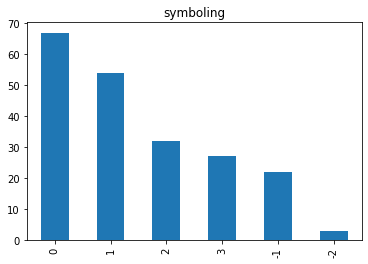

In [15]:
auto.symboling.value_counts().plot.bar(title = "symboling")

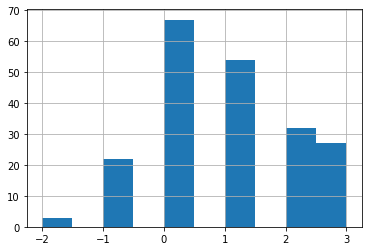

In [16]:
auto['symboling'].hist()
 

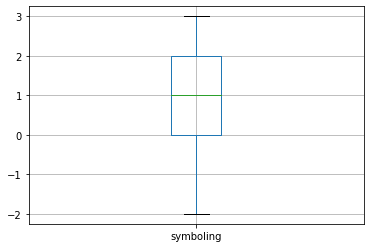

In [17]:
 auto.boxplot(column='symboling')

-2 are outliers here they do  not fall near any other data points

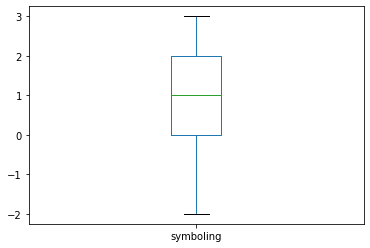

In [18]:
auto['symboling'].plot.box()

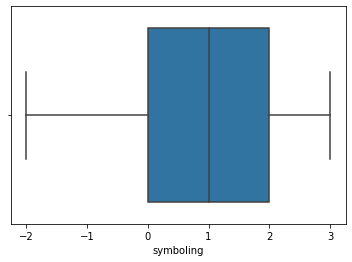

In [19]:
sns.boxplot(x=auto['symboling'])

In [20]:
auto1

NameError: name 'auto1' is not defined

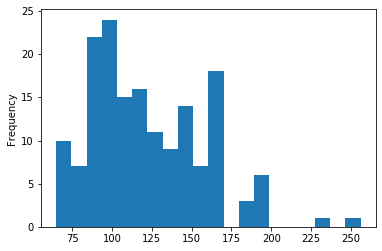

In [21]:
auto['normalized-losses']=auto['normalized-losses'].astype(float)
auto['normalized-losses'].plot.hist(bins=20)

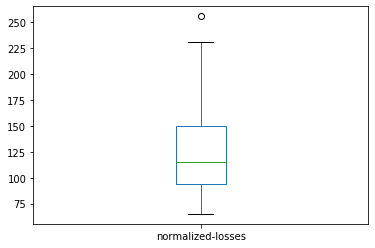

In [22]:
auto['normalized-losses']=auto['normalized-losses'].astype(float)
auto['normalized-losses'].plot.box()

In [ ]:
#auto.boxplot(column ='normalized-losses')#
#fig= plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.hist(auto['normalized-losses'])
#plt.xlabel("sfa")
# auto.boxplot(column='symboling')

In [ ]:
(auto['make'].value_counts()/len(auto['make']))

In [ ]:
(auto['make'].value_counts()/len(auto['make'])).plot.bar(title = 'make-manufacturer', figsize = (15,5))
auto['make'].value_counts()

In [23]:
t =auto[(auto['make'] == 'toyota')]

In [24]:
t.shape

(32, 26)

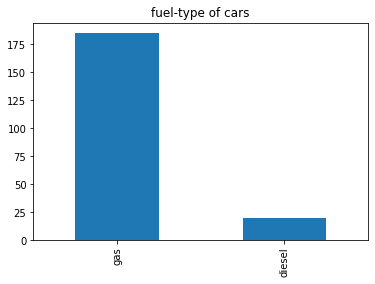

In [25]:
auto['fuel-type'].value_counts().plot.bar(title= 'fuel-type of cars')

In [2]:
auto['aspiration'].value_counts().plot.bar(title= 'aspiration of cars - turbo or standard')

NameError: name 'auto' is not defined

In [ ]:
auto['num-of-doors'].value_counts().plot.bar(title ='number of Doors')

In [ ]:
auto.shape

In [ ]:
auto['body-style'].value_counts().plot.bar(title ='body-styles')

In [ ]:
auto['drive-wheels'].value_counts().plot.pie(title ='drive-wheels',figsize= (5,5),autopct='%.1f%%')

In [ ]:
auto['engine-location'].value_counts().plot.pie(title ='engine-location', figsize= (6,5),autopct='%.1f%%')

In [ ]:
auto['wheel-base'].plot.hist(bins = 30, title ='body-styles')

In [ ]:
auto['wheel-base'].plot.box()

In [ ]:
auto['length'].plot.hist(bins =20)

In [ ]:
auto['length'].plot.box()

In [ ]:
auto['engine-type'].value_counts().plot.bar(title = 'engine-type')

In [ ]:
auto['num-of-cylinders'].value_counts().plot.bar(title = 'number of cylinders')

In [ ]:
auto['engine-size'].plot.hist(bins =20)

In [ ]:
auto['engine-size'].plot.box()

In [ ]:
auto['fuel-system'].value_counts().plot.bar(title = 'fuel-system')

In [ ]:
auto['bore']=auto['bore'].astype(float)
auto['bore'].plot.hist(bins=20)

In [ ]:
auto['bore'].plot.box()

In [ ]:
auto['stroke']= auto['stroke'].astype(float)
auto['stroke'].plot.hist(title = 'stroke of the cars',figsize = (10,5),bins=10)

In [ ]:
auto['stroke'].plot.box()

In [ ]:
auto['compression-ratio'].plot.box()

In [ ]:
auto['compression-ratio'].plot.hist(bins=10)

In [ ]:
#auto['horsepower'].value_counts().plot.bar(figsize = (15,5))
#auto['stroke']= auto['stroke'].astype(float)
#auto['stroke'].value_counts().plot.hist(title = 'stroke of the cars',figsize = (10,5),bins= 25)
auto['horsepower'].value_counts().plot.hist(title= 'horsepower' ,bins=20)

In [ ]:
auto['peak-rpm'] =auto['peak-rpm'].astype(float)
auto['peak-rpm'].value_counts().plot.hist(title= '' ,bins=20)

In [ ]:
auto['city-mpg'].plot.hist(bins=30)

In [ ]:
auto['city-mpg'].plot.box()

In [ ]:
auto['highway-mpg'].plot.hist(bins=30)

In [ ]:
auto['highway-mpg'].plot.box()

In [ ]:
auto['price'].hist(bins=30,)

In [ ]:
auto['price']= auto['price'].astype(float)
auto['price'].plot.hist(bins=30)



In [ ]:
auto.hist(figsize = (15,10), color = 'blue')

In [ ]:

x = auto['make']
y = auto['price']
plt.figure(figsize=(20,5))
plt.scatter(x, y,
            alpha=1, edgecolors='none', s=50)

plt.title('Relation_btw_ price and maker')
plt.legend(loc=1) 

plt.xlabel("make")
plt.ylabel("price")
plt.show()

In [ ]:
x=auto['fuel-type']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [1]:
x=auto['aspiration']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


NameError: name 'auto' is not defined

In [ ]:
auto[auto['fuel-type']== 'gas']

In [ ]:
x=auto['drive-wheels']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.legend(loc=1)
plt.show()



We can infer that  rwd vehicles are more costlier

In [ ]:
x=auto['horsepower']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
x=auto['engine-type']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


ohcv cars are very expensive


In [ ]:
x=auto['highway-mpg']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
x=auto['city-mpg']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


CORRELATION PLOT

In [13]:
corr = auto.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


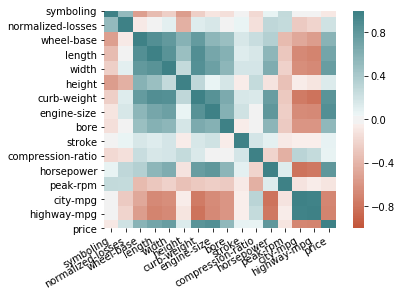

In [15]:
corr = auto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [28]:
    #(corr.style.background_gradient(cmap='corr')
#          .to_excel("mev_corr_matrix.xlsx", engine="openpyxl"))
#(corr.style.background_gradient(cmap='auto')
 #          .set_precision(2)
  #         .to_excel("mev_corr_matrix.xlsx"))

corr.to_excel("../output/correlation.xlsx")

In [16]:
corrmat = auto.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#Sns.heatmap(corrmat, vmax=.8, square=True);


In [17]:
corrmat

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


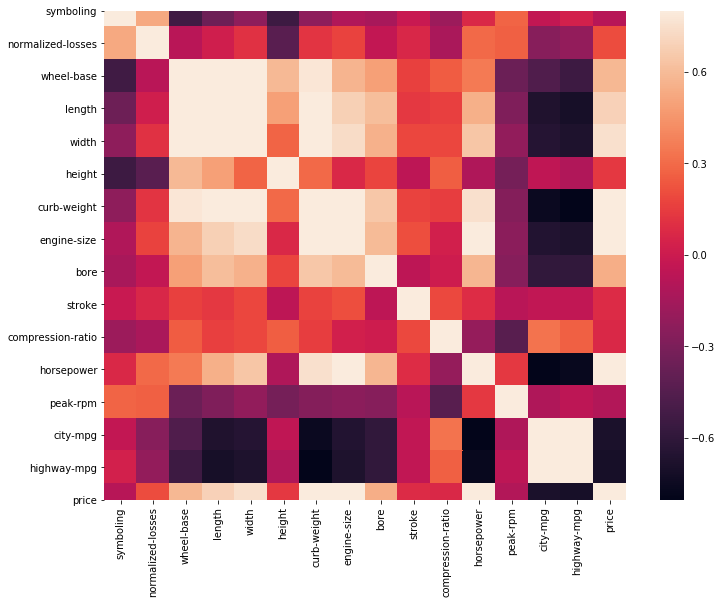

In [31]:

fax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


DATA WRANGLING

<h3> Data wrangling <h3>
<h5> We have removed the following variables <h5>

In [19]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [20]:
eliminatedVars = ['length', 'curb-weight', 'horsepower', 'city-mpg']
auto= auto.drop(eliminatedVars, axis =1)

In [ ]:
    #eliminatedVars = ['length', 'curb-weight', 'horsepower', 'city-mpg']
#auto= auto.drop(eliminatedVars, axis =1)

In [22]:
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000.0,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000.0,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000.0,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,66.2,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500.0,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,66.4,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,68.9,55.5,ohc,four,141,mpfi,3.78,3.15,9.5,5400.0,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,68.8,55.5,ohc,four,141,mpfi,3.78,3.15,8.7,5300.0,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,68.9,55.5,ohcv,six,173,mpfi,3.58,2.87,8.8,5500.0,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,68.9,55.5,ohc,six,145,idi,3.01,3.40,23.0,4800.0,27,22470.0


In [23]:
# checking the missing values
(auto.isnull().sum()*100/len(auto))[auto.isnull().sum()*100/auto.shape[0] != 0]

normalized-losses    20.00000
num-of-doors          0.97561
bore                  1.95122
stroke                1.95122
peak-rpm              0.97561
price                 1.95122
dtype: float64

In [35]:
auto[auto['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
27,1,148.0,dodge,gas,turbo,None,sedan,fwd,front,93.7,63.8,50.6,ohc,four,98,mpfi,3.03,3.39,7.6,5500.0,30,8558.0
63,0,NaN,mazda,diesel,std,None,sedan,fwd,front,98.8,66.5,55.5,ohc,four,122,idi,3.39,3.39,22.7,4650.0,42,10795.0


->replace num-of - doors with mode as most of the cars are of 4 door type
->replace the missing values of bore with mean (no outliers here)
->replacde the missing values of stroke with mean (no outliers here) we have but ignored
->replace peak-rpm is replace with

In [37]:
auto['num-of-doors'].isna().sum()

2

In [24]:
auto['num-of-doors']= auto['num-of-doors'].fillna(statistics.mode(auto['num-of-doors']))

In [39]:
auto['num-of-doors'].isna().sum()

0

In [28]:
auto[auto['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,65.7,49.6,rotor,two,70,4bbl,NaN,NaN,9.4,6000.0,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,65.7,49.6,rotor,two,70,4bbl,NaN,NaN,9.4,6000.0,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,65.7,49.6,rotor,two,70,4bbl,NaN,NaN,9.4,6000.0,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,65.7,49.6,rotor,two,80,mpfi,NaN,NaN,9.4,6000.0,23,15645.0


<h4>bore<h4>

In [ ]:
auto[auto['bore'].isna()]

Here bore and stroke are the attributes of an engine, if we see the engine-type of rotor are not having the bore and stroke values that too from mazda make. This type model engine is not been manufacturing we will replace it with mean.


In [ ]:
auto['fuel-type'].value_counts()

In [ ]:
#CHECKING MISSING  FOR 'peak-rpm'
auto[auto['peak-rpm'].isna()]

for renault cars peak-rpm is missing,we will check on for all renault cars

In [ ]:
auto[(auto['make']=='renault')]

In [ ]:
    #auto['make'].value_counts()
#auto['bore']=auto['bore'].fillna(np.mean(auto['bore']))
#auto['bore'] = auto['bore'].fillna(np.mean(auto['bore']))                               

In [ ]:
auto[auto['peak-rpm'].isna()]

In [ ]:
auto.isnull().sum()

In [ ]:
auto.to_excel("../output/info.xlsx")

In [ ]:
auto['stroke'].isna().sum() #to see how many misisng values does stroke have

In [ ]:
auto[auto['stroke'].isna()]

In [ ]:
auto[auto['peak-rpm'].isna()]

In [ ]:
auto[auto['make']=='renault']

    renault cars are having peak-rpm missing values.

In [ ]:
auto[auto['price'].isna()]

In [ ]:
auto[(auto['make']=='audi')]

In [ ]:
auto[(auto['make']=='isuzu')]

In [ ]:
auto[(auto['make']== 'porsche')]

In [29]:
auto['bore'] = auto['bore'].fillna(np.mean(auto['bore']))

In [30]:
auto['stroke']= auto['stroke'].fillna(np.mean(auto['stroke']))
#auto['stroke'] = auto['stroke'].fillna(np.mean(auto['stroke']))

In [31]:
auto['price'] = auto['price'].fillna(np.mean(auto['price']))

In [32]:
auto['peak-rpm'] = auto['peak-rpm'].fillna(np.mean(auto['peak-rpm']))

In [33]:
auto=auto.drop('normalized-losses',axis = 1)

In [34]:
auto.isna().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
width                0
height               0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
highway-mpg          0
price                0
dtype: int64

In [35]:
dummy1 = pd.get_dummies(auto['make'])
auto =  pd.concat([dummy1, auto], axis =1 )

In [36]:
dummy2 = pd.get_dummies(auto['body-style'])
auto =  pd.concat([dummy2, auto], axis =1 )

In [37]:
dummy3 = pd.get_dummies(auto['drive-wheels'])
auto =  pd.concat([dummy3, auto], axis =1 )

In [38]:
dummy4 = pd.get_dummies(auto['engine-type'])
auto =  pd.concat([dummy4, auto], axis =1 )

In [39]:
dummy5= pd.get_dummies(auto['num-of-cylinders'])
auto =  pd.concat([dummy5, auto], axis =1 )

In [40]:
dummy6 = pd.get_dummies(auto['fuel-system'])
auto =  pd.concat([dummy6, auto], axis =1 )

In [41]:
auto['fuel-type']= auto['fuel-type'].replace(['gas'],0)
auto['fuel-type']= auto['fuel-type'].replace(['diesel'],1)

In [42]:
auto['num-of-doors']= auto['num-of-doors'].replace(['two'],0)
auto['num-of-doors']= auto['num-of-doors'].replace(['four'],1)

In [43]:
#auto.aspiration.value_counts()
auto['aspiration']= auto['aspiration'].replace(['std'],0)
auto['aspiration']= auto['aspiration'].replace(['turbo'],1)

In [44]:

auto['engine-location']= auto['engine-location'].replace(['front'],0)
auto['engine-location']= auto['engine-location'].replace(['rear'],1)

In [46]:
auto

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,alfa-romero,0,0,0,convertible,rwd,0,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000.0,27,13495.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,alfa-romero,0,0,0,convertible,rwd,0,88.6,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000.0,27,16500.0
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,alfa-romero,0,0,0,hatchback,rwd,0,94.5,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000.0,26,16500.0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,audi,0,0,1,sedan,fwd,0,99.8,66.2,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500.0,30,13950.0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,audi,0,0,1,sedan,4wd,0,99.4,66.4,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,volvo,0,0,1,sedan,rwd,0,109.1,68.9,55.5,ohc,four,141,mpfi,3.78,3.15,9.5,5400.0,28,16845.0
201,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,volvo,0,1,1,sedan,rwd,0,109.1,68.8,55.5,ohc,four,141,mpfi,3.78,3.15,8.7,5300.0,25,19045.0
202,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,volvo,0,0,1,sedan,rwd,0,109.1,68.9,55.5,ohcv,six,173,mpfi,3.58,2.87,8.8,5500.0,23,21485.0
203,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,volvo,1,1,1,sedan,rwd,0,109.1,68.9,55.5,ohc,six,145,idi,3.01,3.40,23.0,4800.0,27,22470.0


In [48]:
 auto = auto.drop(['make','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system'], axis = 1)

In [49]:
#auto=  auto.drop(['make','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system'],axis = 1)
auto

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,width,height,engine-size,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,88.6,64.1,48.8,130,3.47,2.68,9.0,5000.0,27,13495.0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,88.6,64.1,48.8,130,3.47,2.68,9.0,5000.0,27,16500.0
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,94.5,65.5,52.4,152,2.68,3.47,9.0,5000.0,26,16500.0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,99.8,66.2,54.3,109,3.19,3.40,10.0,5500.0,30,13950.0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,99.4,66.4,54.3,136,3.19,3.40,8.0,5500.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,109.1,68.9,55.5,141,3.78,3.15,9.5,5400.0,28,16845.0
201,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,1,1,0,109.1,68.8,55.5,141,3.78,3.15,8.7,5300.0,25,19045.0
202,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,109.1,68.9,55.5,173,3.58,2.87,8.8,5500.0,23,21485.0
203,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,1,1,1,0,109.1,68.9,55.5,145,3.01,3.40,23.0,4800.0,27,22470.0


In [51]:
import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X, y = np.arange(10).reshape((5, 2)), range(5)

To split the data into two parts i.e independrn variables(X), dependent variables(Y).

In [52]:
x=auto.iloc[:,:-1]

In [53]:
x

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,width,height,engine-size,bore,stroke,compression-ratio,peak-rpm,highway-mpg
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,88.6,64.1,48.8,130,3.47,2.68,9.0,5000.0,27
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,88.6,64.1,48.8,130,3.47,2.68,9.0,5000.0,27
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,94.5,65.5,52.4,152,2.68,3.47,9.0,5000.0,26
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,99.8,66.2,54.3,109,3.19,3.40,10.0,5500.0,30
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,99.4,66.4,54.3,136,3.19,3.40,8.0,5500.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,109.1,68.9,55.5,141,3.78,3.15,9.5,5400.0,28
201,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,1,1,0,109.1,68.8,55.5,141,3.78,3.15,8.7,5300.0,25
202,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,109.1,68.9,55.5,173,3.58,2.87,8.8,5500.0,23
203,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,1,1,1,0,109.1,68.9,55.5,145,3.01,3.40,23.0,4800.0,27


In [54]:
y=auto.iloc[:,-1]

In [55]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [1]:
tv_train.shape

NameError: name 'tv_train' is not defined

In [59]:
tv_test.shape

(52,)

In [57]:
from sklearn.preprocessing import Imputer

In [102]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [103]:
sv_train

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,width,height,engine-size,bore,stroke,compression-ratio,peak-rpm,highway-mpg
163,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,94.5,64.0,52.6,98,3.19,3.03,9.0,4800.0,34
61,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,98.8,66.5,53.7,122,3.39,3.39,8.6,4800.0,32
75,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,102.7,68.0,54.8,140,3.78,3.12,8.0,5000.0,24
106,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,99.2,67.9,49.7,181,3.43,3.27,9.0,5200.0,25
63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,98.8,66.5,55.5,122,3.39,3.39,22.7,4650.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,1,0,110.0,70.3,56.5,183,3.58,3.64,21.5,4350.0,25
192,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,100.4,66.9,55.1,97,3.01,3.40,23.0,4500.0,38
117,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,108.0,68.3,56.0,134,3.61,3.21,7.0,5600.0,24
47,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,113.0,69.6,52.8,258,3.63,4.17,8.1,4750.0,19


In [104]:
tv_train.shape

(153,)

In [105]:
sv_train.isna().sum()

1bbl                 0
2bbl                 0
4bbl                 0
idi                  0
mfi                  0
                    ..
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
highway-mpg          0
Length: 66, dtype: int64

In [106]:
sv_test


,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,4wd,fwd,rwd,convertible,hardtop,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,width,height,engine-size,bore,stroke,compression-ratio,peak-rpm,highway-mpg
52,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,93.1,64.2,54.1,91,3.030000,3.150000,9.0,5000.000000,38
181,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1,0,0,1,0,104.5,66.5,54.1,161,3.270000,3.350000,9.2,5200.000000,24
5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,99.8,66.3,53.1,136,3.190000,3.400000,8.5,5500.000000,25
18,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,88.4,60.3,53.2,61,2.910000,3.030000,9.5,5100.000000,53
188,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,97.3,65.5,55.7,109,3.190000,3.400000,10.0,5500.000000,32
170,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,98.4,65.6,52.0,146,3.620000,3.500000,9.3,4800.000000,30
76,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,93.7,64.4,50.8,92,2.970000,3.230000,9.4,5500.000000,41
154,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,95.7,63.6,59.1,92,3.050000,3.030000,9.0,4800.000000,32
104,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,91.3,67.9,49.7,181,3.430000,3.270000,9.0,5200.000000,25
33,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,93.7,64.0,52.6,92,2.910000,3.410000,9.2,6000.000000,34


In [107]:

from sklearn.linear_model import LinearRegression

In [108]:
lreg = LinearRegression()



In [109]:
lreg.fit(sv_train,tv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
x.columns

Index(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'eight',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'dohc', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', '4wd', 'fwd', 'rwd', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'alfa-romero', 'audi', 'bmw',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'symboling', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'width', 'height',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'peak-rpm',
       'highway-mpg'],
      dtype='object')

In [111]:
coeff = list(lreg.coef_)
columns = list(x.columns)

In [112]:

pd.DataFrame({'col': columns, 'coeff': coeff}).to_csv('../OUTPUT/coeff.csv')
pd.DataFrame({ 'price act': y, 'price pred': lreg.predict(x)}).to_csv('../OUTPUT/pred.csv')

In [115]:
import statsmodels.regression.linear_model as sm
from sklearn import datasets, linear_model,metrics
#import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = tv_train, exog = sv_train).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     64.89
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.33e-58
Time:                        20:47:37   Log-Likelihood:                -1315.3
No. Observations:                 153   AIC:                             2737.
Df Residuals:                     100   BIC:                             2897.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
1bbl              -8774.7332   2815.260     -3.117      0.002   -1.44e+04   -3189.337
2bbl              -6572.5314   2520.403     -2.608      0.011   -1.16e+04   -1572.123
4bbl              -8101.8396   3352.866     -2.416      0.017   -1.48e+04   -1449.849
idi                2136.6691   3835.347      0.557      0.579   -5472.550    9745.888
mfi               -6523.6369   3247.652     -2.009      0.047    -1.3e+04     -80.388
mpfi              -6380.3670   2566.155     -2.486      0.015   -1.15e+04   -1289.189
spdi              -7565.0905   2672.672     -2.831      0.006   -1.29e+04   -2262.585
spfi              -4901.7569   3772.658     -1.299      0.197   -1.24e+04    2583.090
eight             -9750.7776   3227.042     -3.022      0.003   -1.62e+04   -3348.418
five              -1.018e+04   5254.443     -1.938      0.056   -2.06e+04     244.000
four              -5794.2372   6254.331     -0.926      0.356   -1.82e+04    6614.177
six               -6631.4529   3643.874     -1.820      0.072   -1.39e+04     597.890
three              -4.95e-09   3.53e-09     -1.401      0.164    -1.2e-08    2.06e-09
twelve            -1.086e+04   5526.491     -1.965      0.052   -2.18e+04     106.085
two               -3467.8385   5183.442     -0.669      0.505   -1.38e+04    6815.962
dohc              -1.044e+04   3709.199     -2.815      0.006   -1.78e+04   -3080.748
dohcv             -9.058e-09   3.45e-09     -2.627      0.010   -1.59e-08   -2.22e-09
l                 -7594.3050   2338.472     -3.248      0.002   -1.22e+04   -2954.844
ohc               -9128.1940   3418.272     -2.670      0.009   -1.59e+04   -2346.440
ohcf              -3898.3579   2845.166     -1.370      0.174   -9543.087    1746.371
ohcv              -1.215e+04   3713.706     -3.273      0.001   -1.95e+04   -4787.011
rotor             -3467.8385   5183.442     -0.669      0.505   -1.38e+04    6815.962
4wd               -1.598e+04   6695.976     -2.386      0.019   -2.93e+04   -2694.388
fwd               -1.626e+04   6767.068     -2.402      0.018   -2.97e+04   -2831.100
rwd               -1.445e+04   6847.547     -2.110      0.037    -2.8e+04    -862.164
convertible       -5466.0844   4282.339     -1.276      0.205    -1.4e+04    3029.955
hardtop           -1.048e+04   4112.511     -2.549      0.012   -1.86e+04   -2322.240
hatchback         -9973.7169   3967.132     -2.514      0.014   -1.78e+04   -2103.040
sedan             -1.016e+04   4040.347     -2.514      0.014   -1.82e+04   -2140.600
wagon             -1.061e+04   4121.153     -2.573      0.012   -1.88e+04   -2429.356
alfa-romero       -1946.5874   1738.694     -1.120      0.266   -5396.107    1502.932
audi              -2035.8056   1873.560     -1.087      0.280   -5752.896    1681.284
bmw                3259.1143   1803.480      1.807      0.074    -318.939

In [120]:
pd.DataFrame({ 'price act': tv_train, 'price pred': regressor_OLS.predict(sv_train)}).to_csv('../OUTPUT/pred4.csv')